In [34]:
import torch
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [49]:
# We want to create a 2D array to store bigram counts
# Axes will be the alphabet, and the value of each cell will be the number of times that the bigram occurs
# We have 28 characters in our alphabet (a-z + {<S>, <E>})
b_arr = torch.zeros((27, 27), dtype=torch.int32)

In [50]:
# Now, we need a lookup table mapping characters to indices
alphabet = sorted(set(''.join(words)))
s_to_i = {}

# Dot will be a special character denoting the start or end of a string
sp_char = '.'
s_to_i[sp_char] = 0

for i, s in enumerate(alphabet):
    s_to_i[s] = i + 1

In [51]:
for w in words:
    # Create full list of characters, including start & end characters
    chs = [sp_char] + list(w) + [sp_char]

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        # Increment bigram count
        b_arr[ix1, ix2] += 1

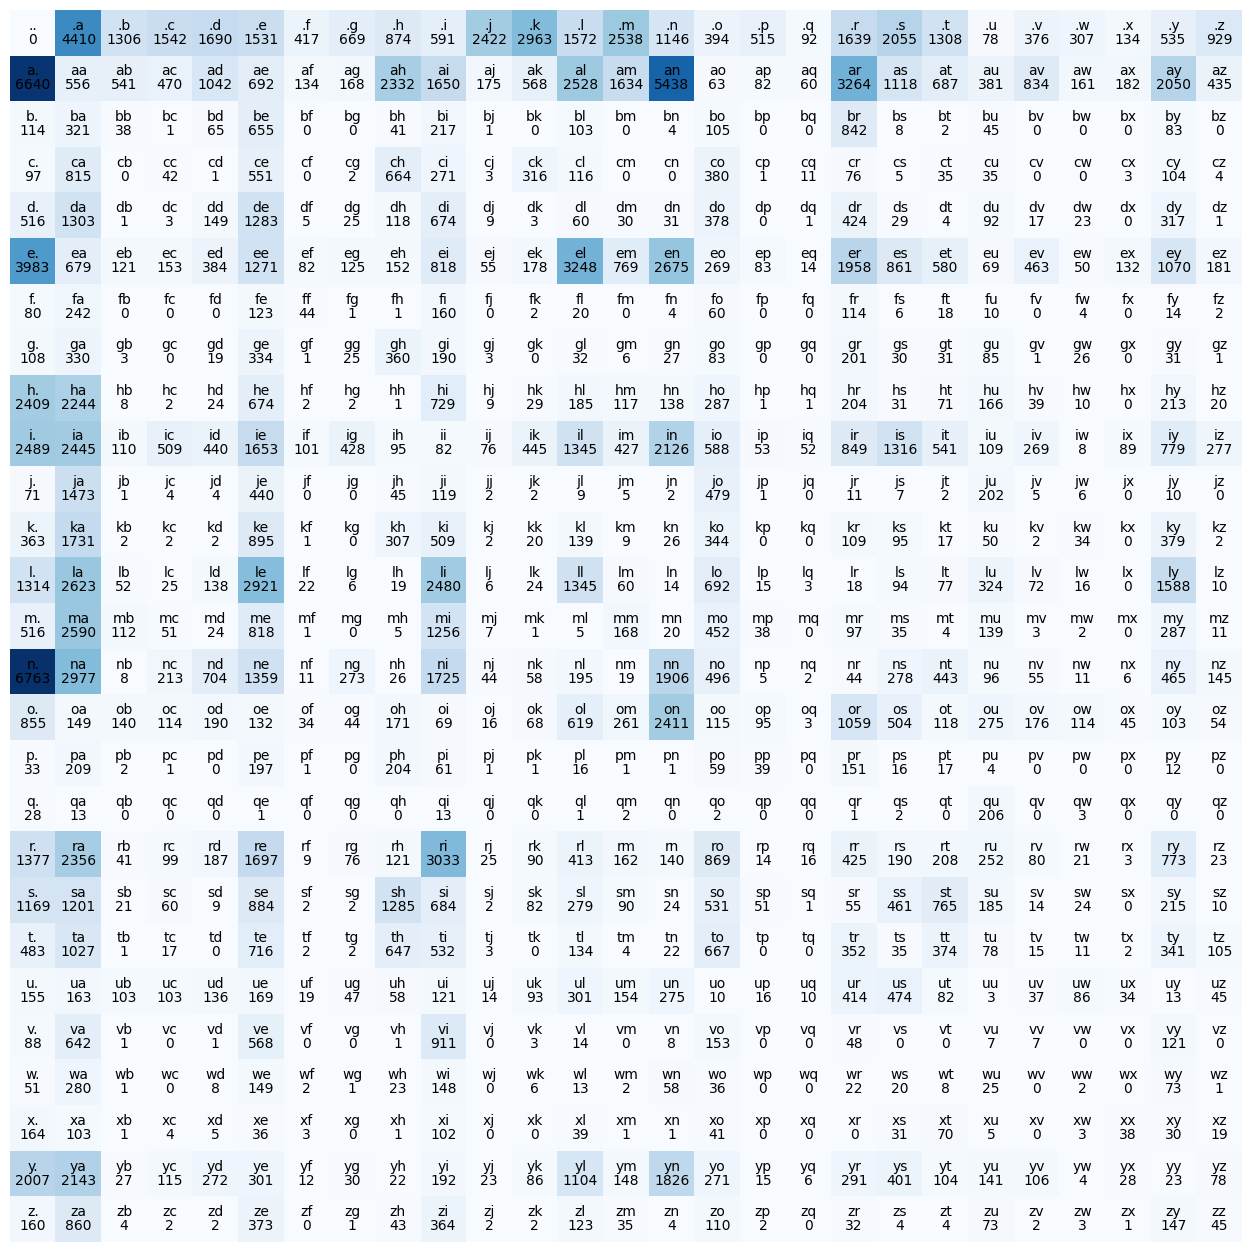

In [55]:
i_to_s = {i: s for s, i in s_to_i.items()}

plt.figure(figsize=(16, 16))
plt.imshow(b_arr, cmap='Blues')
for i in range(len(i_to_s)):
    for j in range(len(i_to_s)):
        bigram = i_to_s[i] + i_to_s[j]
        plt.text(j, i, bigram, ha='center', va='bottom')
        plt.text(j, i, b_arr[i, j].item(), ha='center', va='top')
plt.axis('off');

In [64]:
# Want to understand probability distribution of first characters in names
# First row in b_arr represents all first character bigrams
# Convert first character bigrams to probabilities
first_char_probs = b_arr[0].float()
first_char_probs /= first_char_probs.sum()
first_char_probs

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
new textfdasfdsa